In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [3]:
x, y = sklearn.datasets.make_moons(200, noise=0.2)

In [4]:
x

array([[ 3.83674436e-01, -8.15107054e-02],
       [-8.67706757e-01, -6.79501471e-02],
       [ 1.03091550e+00,  6.19528338e-01],
       [-1.12076969e+00,  4.92977422e-01],
       [ 9.06893222e-01,  1.10566886e+00],
       [-9.61278874e-01,  9.27013492e-01],
       [ 4.97206420e-02,  1.17623314e+00],
       [-8.18381654e-01,  4.13411858e-01],
       [ 1.56402785e+00,  1.91422259e-01],
       [ 1.64120587e+00, -7.32550980e-01],
       [ 1.79606202e+00, -1.54794165e-01],
       [ 8.23997058e-01,  7.84219392e-01],
       [-7.88091112e-01,  5.34685168e-01],
       [ 7.37958947e-01,  8.15376112e-01],
       [ 3.68612700e-01,  1.79578375e-01],
       [-6.05734538e-01,  7.26863319e-01],
       [ 1.93480670e+00, -2.75637457e-02],
       [ 7.44186678e-01,  2.87225446e-01],
       [ 1.31680719e+00, -4.80119853e-01],
       [-3.36778422e-01,  8.25248957e-01],
       [-9.76516495e-01,  2.33562178e-01],
       [ 1.99130818e+00, -3.39457859e-02],
       [ 6.64342776e-01, -3.57013032e-01],
       [ 9.

In [5]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0], dtype=int64)

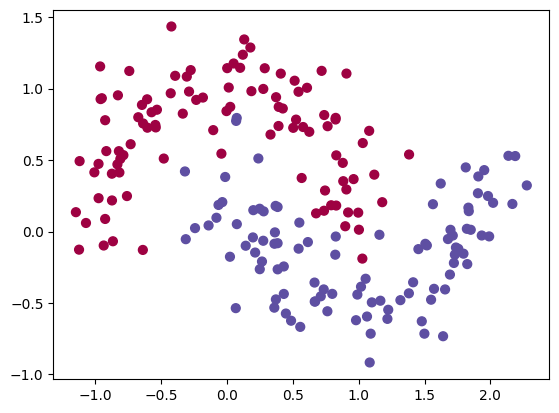

In [7]:
plt.scatter(x[:, 0], x[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

In [8]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [ ]:
x

In [ ]:
y

In [11]:
class FeedForwad(nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super().__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons, output_neurons)
        
    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)
        return x

In [12]:
network = FeedForwad(input_neurons=2, hidden_neurons=50, output_neurons=2)
optimizer = torch.optim.SGD(network.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

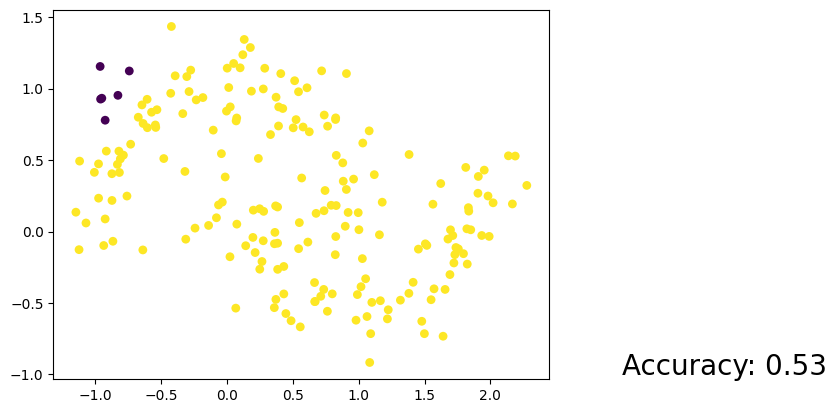

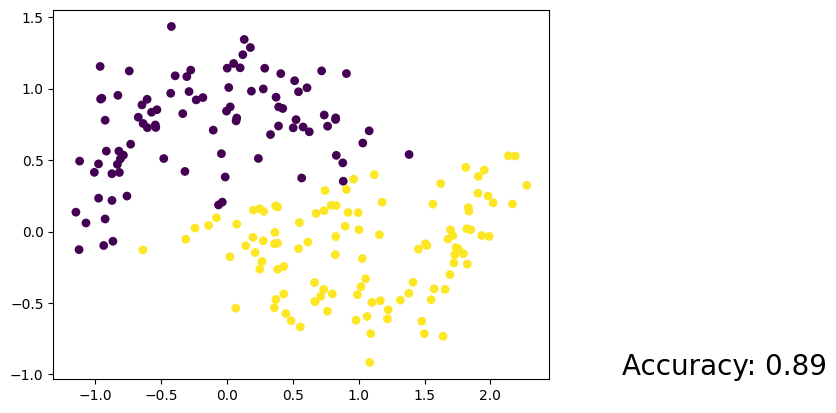

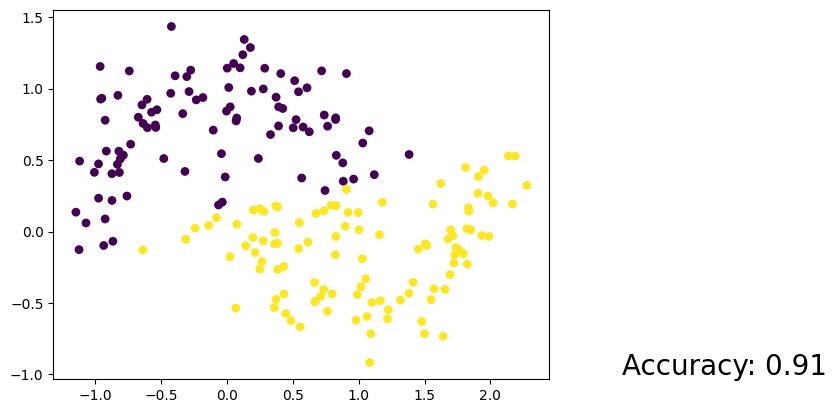

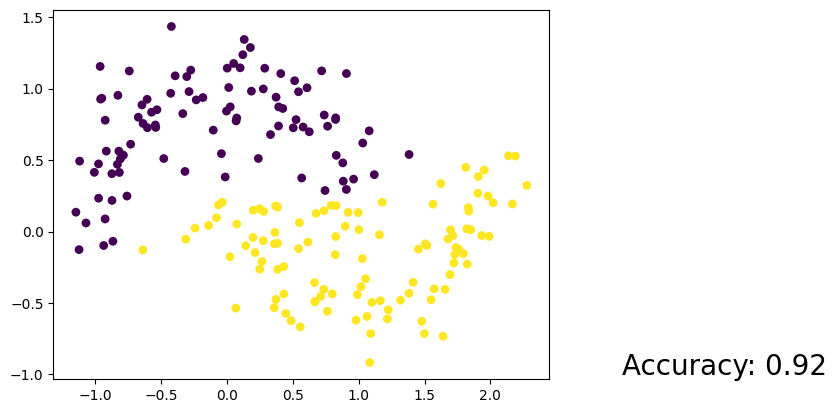

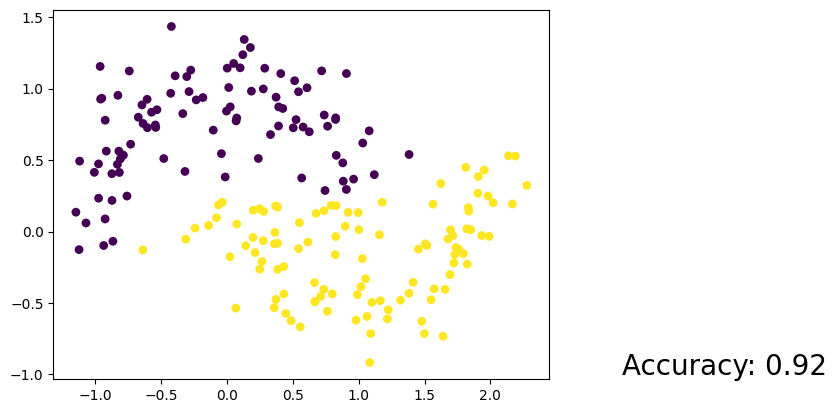

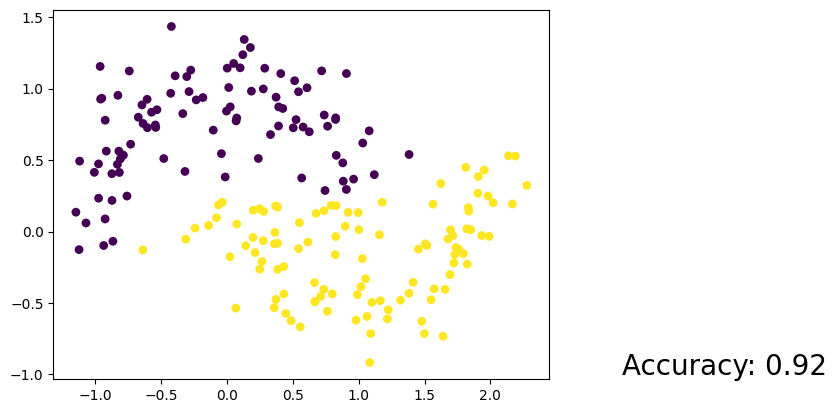

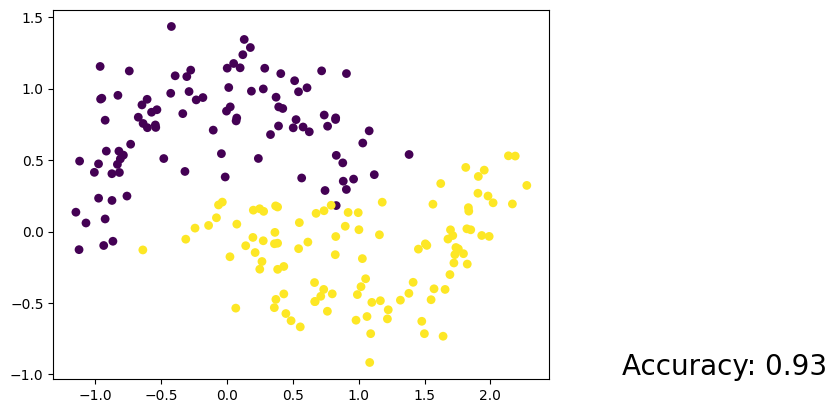

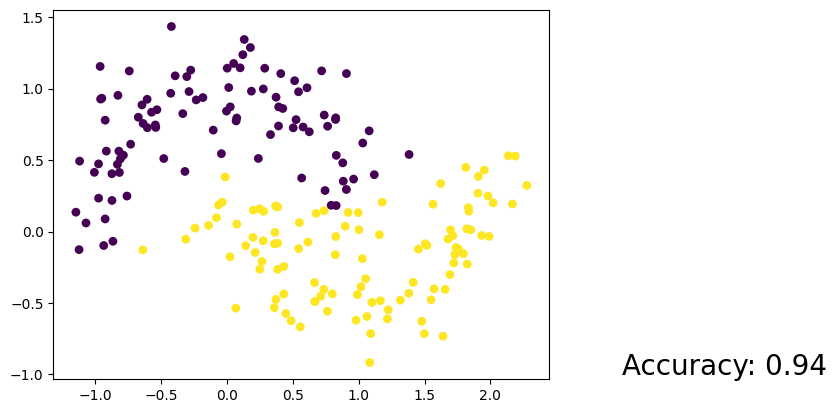

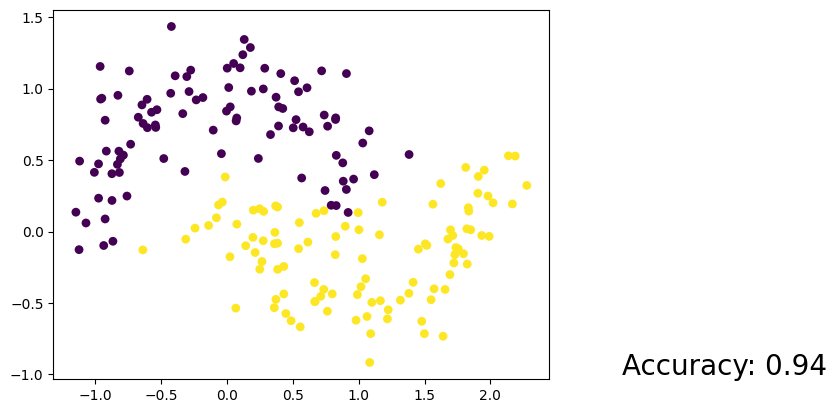

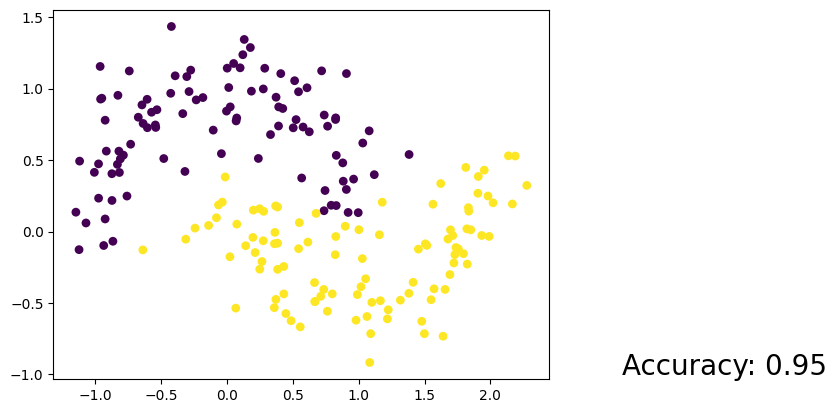

In [14]:
for epoch in range(10000):
    optimizer.zero_grad()
    output = network(x)
    loss = loss_fn(output, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        # show the learning process
        max_values, prediction = torch.max(output, 1)
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], s=40, c=predicted_y, lw=0)
        accuracy = (predicted_y == target_y).mean()
        plt.text(3, -1, f"Accuracy: {accuracy:.2f}", fontdict={"size": 20})
        plt.pause(0.1)

plt.ioff()
plt.show()